In [1]:
from Bio import SeqIO
import time
import random
from algos import needwunsch
from algos import banding
from algos import dijkstra
from algos import astar_seed

In [2]:
# fasta_sequences = SeqIO.parse(open("seq_files\seq_len-1000_mut-10%.fasta"),'fasta')
# ls = []
# for fasta in fasta_sequences:
#         name, sequence = fasta.id, str(fasta.seq)
#         ls.append(sequence)
        
# s,t = ls[0], ls[1]
# m,n = len(s), len(t)

In [3]:
def sequence_generator(seq_len, mut_rate):

    # Generate first random amino acid sequence
    seq1 = ''.join([random.choice('ACDEFGHIKLMNPQRSTVWY') for _ in range(seq_len)])

    # Calculate the number of mutations based on mutation rate and sequence length
    num_mutations = int(seq_len * mut_rate/100)

    # Generate second amino acid sequence with exact mutations
    mutation_positions = random.sample(range(seq_len), num_mutations)
    seq2 = list(seq1)
    for pos in mutation_positions:
        aa = random.choice('ACDEFGHIKLMNPQRSTVWY'.replace(seq1[pos], ''))
        seq2[pos] = aa
    seq2 = ''.join(seq2)

    return [seq1, seq2]


In [26]:
sequences_dict = {}

# Example values for length and mutation rate
lengths = [100, 500, 1000, 5000, 10000] 
# error_rate = [5,10,15,20,25,30]
error_rate = [1,2,5,10,15]


# lengths = [100, 500] 
# error_rate = [5,10]

# Generate sequences with the given length and error rate
output_sequences = []
for length in lengths: 
    for err in error_rate:
        key = (length, err)
        sequences_dict[key] =  sequence_generator(length, err)
  



In [6]:
from tqdm import tqdm

In [33]:
exec_times = {}
edit_distances = {}
explored_states = {}

for key, value in tqdm(sequences_dict.items()):
    print()
    seq1 = value[0]
    seq2 = value[1]
    m,n = len(seq1), len(seq2)

    start_time = time.time()
    ed, DP = needwunsch(seq1, seq2)
    end_time = time.time()
    exec_times[(key, "Needlman-Wunsch")] = round(end_time - start_time,3)
    edit_distances[(key, "Needlman-Wunsch")] = ed
    explored_states[(key, "Needlman-Wunsch")] = len(DP)

    start_time = time.time()
    ed, DP = banding(seq1, seq2,m,n, abs(m-n))
    end_time = time.time()
    exec_times[(key, "Banding")] = round(end_time - start_time,3)
    edit_distances[(key, "Banding")] = ed
    explored_states[(key, "Banding")] = len(DP)

    start_time = time.time()
    ed, DP = dijkstra(seq1, seq2,m,n)
    end_time = time.time()
    exec_times[(key, "Djiksta")] = round(end_time - start_time,3)
    edit_distances[(key, "Djiksta")] = ed
    explored_states[(key, "Djiksta")] = len(DP)

    start_time = time.time()
    ed, DP = astar_seed(seq1, seq2,m,n,4)
    end_time = time.time()
    exec_times[(key, "A* Seed")] = round(end_time - start_time,3)
    edit_distances[(key, "A* Seed")] = ed
    explored_states[(key, "A* Seed")] = len(DP)

 

  4%|▍         | 1/25 [00:01<00:31,  1.32s/it]

 24%|██▍       | 6/25 [00:01<00:03,  4.79it/s]

 32%|███▏      | 8/25 [00:02<00:03,  4.26it/s]

 36%|███▌      | 9/25 [00:02<00:04,  3.42it/s]

 40%|████      | 10/25 [00:03<00:05,  2.68it/s]

 44%|████▍     | 11/25 [00:04<00:07,  1.98it/s]

 48%|████▊     | 12/25 [00:05<00:08,  1.45it/s]

 52%|█████▏    | 13/25 [00:07<00:11,  1.06it/s]

 56%|█████▌    | 14/25 [00:09<00:14,  1.29s/it]

 60%|██████    | 15/25 [00:12<00:17,  1.78s/it]

 64%|██████▍   | 16/25 [00:44<01:34, 10.50s/it]

 68%|██████▊   | 17/25 [01:19<02:21, 17.65s/it]

 72%|███████▏  | 18/25 [02:04<02:58, 25.48s/it]

 76%|███████▌  | 19/25 [03:18<03:59, 39.88s/it]

 80%|████████  | 20/25 [04:58<04:48, 57.75s/it]

 84%|████████▍ | 21/25 [07:21<05:32, 83.05s/it]

 88%|████████▊ | 22/25 [10:07<05:24, 108.02s/it]

 92%|█████████▏| 23/25 [13:44<04:40, 140.46s/it]

 96%|█████████▌| 24/25 [19:12<03:16, 196.56s/it]

100%|██████████| 25/25 [29:30<00:00, 70.81s/it] 


In [36]:
# write the results dicts to a file
import pickle


# Save dictionaries to a file
with open('dicts.pkl', 'wb') as f:
    pickle.dump((exec_times, edit_distances, explored_states), f)

# # Load dictionaries from the file
# with open('dicts.pkl', 'rb') as f:
#     exec_times, edit_distances, explored_states = pickle.load(f)


In [35]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_pdf import PdfPages


In [ ]:
# # Plotting values for each algorithm across different lengths
# algorithms = ["Needlman-Wunsch","Banding", "Djiksta","A* Seed"]  # List of algorithms to plot

# for algorithm in algorithms:

#     lengths = []
#     execution_times = []
#     error_rates = []

#     for key, value in exec_times.items():
#         (length, error_rate), algo_name = key
#         if algo_name == algorithm and error_rate == 15: # for each algo, given err rate
#             lengths.append(length)
#             # error_rates.append(err)
#             execution_times.append(math.log(value))
    
#     plt.plot(lengths, execution_times, marker='o', label=algorithm)

# plt.xlabel('Length')
# plt.ylabel('Execution Time')
# plt.title('Execution Time Comparison for Algorithms across Different Lengths')
# plt.legend()
# plt.show()

In [38]:
edit_distances

{((100, 1), 'Needlman-Wunsch'): 1,
 ((100, 1), 'Banding'): 1,
 ((100, 1), 'Djiksta'): 1,
 ((100, 1), 'A* Seed'): 1,
 ((100, 2), 'Needlman-Wunsch'): 2,
 ((100, 2), 'Banding'): 2,
 ((100, 2), 'Djiksta'): 2,
 ((100, 2), 'A* Seed'): 2,
 ((100, 5), 'Needlman-Wunsch'): 5,
 ((100, 5), 'Banding'): 5,
 ((100, 5), 'Djiksta'): 5,
 ((100, 5), 'A* Seed'): 5,
 ((100, 10), 'Needlman-Wunsch'): 10,
 ((100, 10), 'Banding'): 10,
 ((100, 10), 'Djiksta'): 10,
 ((100, 10), 'A* Seed'): 10,
 ((100, 15), 'Needlman-Wunsch'): 15,
 ((100, 15), 'Banding'): 15,
 ((100, 15), 'Djiksta'): 15,
 ((100, 15), 'A* Seed'): 15,
 ((500, 1), 'Needlman-Wunsch'): 5,
 ((500, 1), 'Banding'): 5,
 ((500, 1), 'Djiksta'): 5,
 ((500, 1), 'A* Seed'): 5,
 ((500, 2), 'Needlman-Wunsch'): 10,
 ((500, 2), 'Banding'): 10,
 ((500, 2), 'Djiksta'): 10,
 ((500, 2), 'A* Seed'): 10,
 ((500, 5), 'Needlman-Wunsch'): 25,
 ((500, 5), 'Banding'): 25,
 ((500, 5), 'Djiksta'): 25,
 ((500, 5), 'A* Seed'): 25,
 ((500, 10), 'Needlman-Wunsch'): 50,
 ((500, 10)

C:\Users\susia\AppData\Local\Temp\ipykernel_4648\1863082242.py:17: RuntimeWarning: divide by zero encountered in log
  y.append(np.log(value))


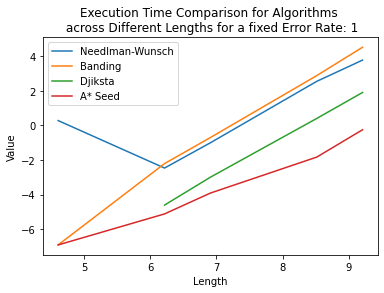

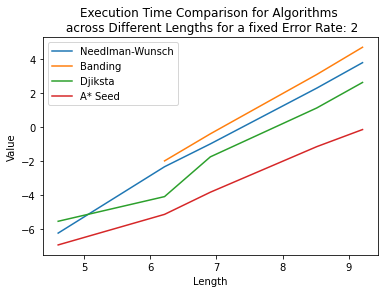

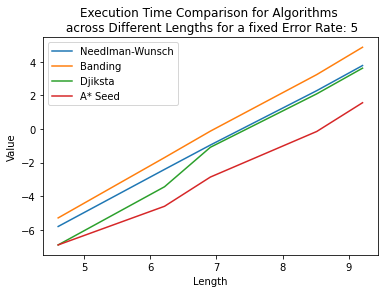

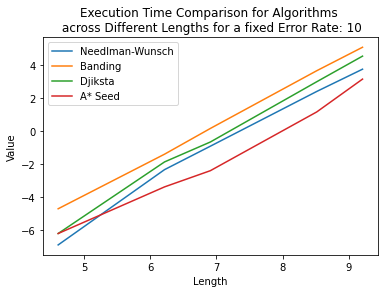

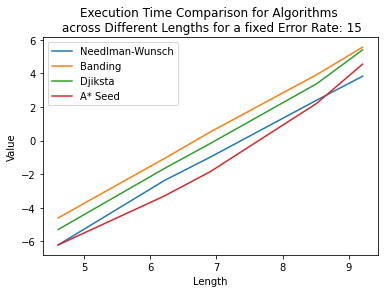

In [39]:

# Sample data
algorithms = ["Needlman-Wunsch","Banding", "Djiksta","A* Seed"]  # List of algorithms to plot
# Create a PDF file to save the plots
pdf_pages = PdfPages('execution_time_scaling_log_log.pdf')
# Separate plots for different error rates
for err_rate in error_rate:
    # Initialize a new plot for each error rate
    fig, ax = plt.subplots()

    # Plot values across lengths for each algorithm
    for algorithm in algorithms:
        x = []
        y = []
        for length in lengths:
            value = exec_times.get(((length, err_rate), algorithm), 0)
            x.append(np.log(length))
            y.append(np.log(value))
        ax.plot(x, y, label=algorithm)

    # Set labels and title
    ax.set_xlabel('Length')
    ax.set_ylabel('Value')
    ax.set_title(f"Execution Time Comparison for Algorithms \n across Different Lengths for a fixed Error Rate: {err_rate}")

    # Add legend
    ax.legend()

     # Add the current plot to the PDF file
    pdf_pages.savefig()

# Save and close the PDF file
pdf_pages.close()

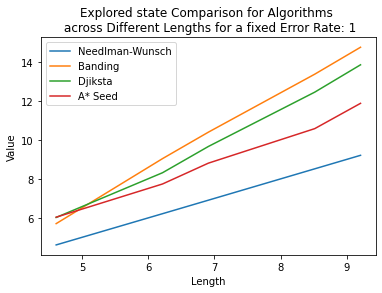

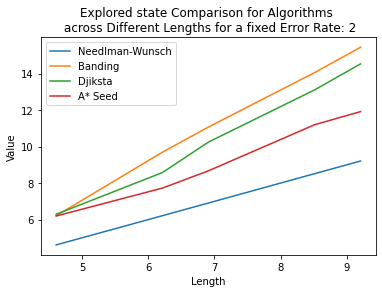

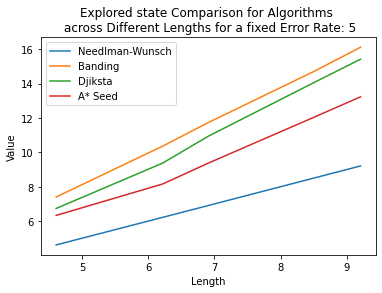

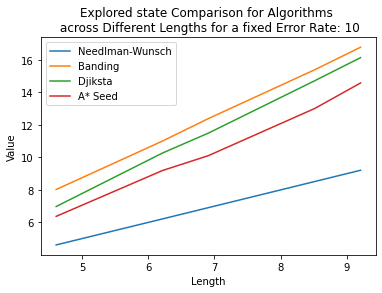

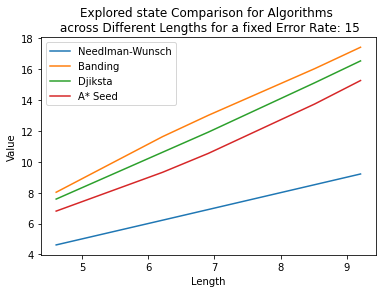

In [41]:

# Sample data
algorithms = ["Needlman-Wunsch","Banding", "Djiksta","A* Seed"]  # List of algorithms to plot
# Create a PDF file to save the plots
pdf_pages = PdfPages('explored_state_scaling—լօգ—լօգ.pdf')
# Separate plots for different error rates
for err_rate in error_rate:
    # Initialize a new plot for each error rate
    fig, ax = plt.subplots()

    # Plot values across lengths for each algorithm
    for algorithm in algorithms:
        x = []
        y = []
        for length in lengths:
            value = explored_states.get(((length, err_rate), algorithm), 0)
            x.append(np.log(length))
            y.append(np.log(value))
        ax.plot(x, y, label=algorithm)

    # Set labels and title
    ax.set_xlabel('Length')
    ax.set_ylabel('Value')
    ax.set_title(f"Explored state Comparison for Algorithms \n across Different Lengths for a fixed Error Rate: {err_rate}")

    # Add legend
    ax.legend()

     # Add the current plot to the PDF file
    pdf_pages.savefig()

# Save and close the PDF file
pdf_pages.close()

**Needlman-Wunsch**

In [32]:
start_time = time.time()

ed, DP = needwunsch(s,t)
print(ed)

end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time, "seconds")

100
Execution time: 0.5920794010162354 seconds


**Banding DP**

In [33]:
start_time = time.time()

ed, DP, b = banding(s,t,m,n,abs(m-n))

print(ed)

end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time, "seconds")

100
Execution time: 1.7604374885559082 seconds


**Djikstra**

In [34]:
start_time = time.time()

ed, DP = dijkstra(s,t,m,n)

print(ed)

end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time, "seconds")


100
Execution time: 0.7237071990966797 seconds


**A star with seed**

In [35]:
start_time = time.time()

ed, DP, DPH = astar_seed(s,t,m,n,4)

print(ed)

end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time, "seconds")

100
Execution time: 0.10377168655395508 seconds
